Graficar y Analizar skills optimas basadas en alta demanda y salarios altos, tablas a comparar con trabajos remotos y presenciales

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

#loading data
dataset_presencial = pd.read_csv("csv/5_1_remote_query_optimal_skills.csv", sep=',')
dataset_remoto = pd.read_csv("csv/5_2_onsite_query_optimal_skills.csv", sep=',')

d:\Anaconda\envs\cursito\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#unificar datasets para graficar
df_onsite = dataset_presencial.copy()
df_onsite['work_mode'] = 'Onsite'
df_remoto = dataset_remoto.copy()
df_remoto['work_mode'] = 'Remote'

In [4]:
#primero hacemos el grafico con remoto
df_remoto_plot = (
    df_remoto
    .groupby('skills', as_index=False)
    .agg({
        'salary_avg': 'mean',
        'demand_count': 'sum'
    })
    .head(10)
    .sort_values('salary_avg', ascending=False)
)
df_remoto_plot = df_remoto_plot.reset_index(drop=True)


Grafico Skills Optimas Remoto

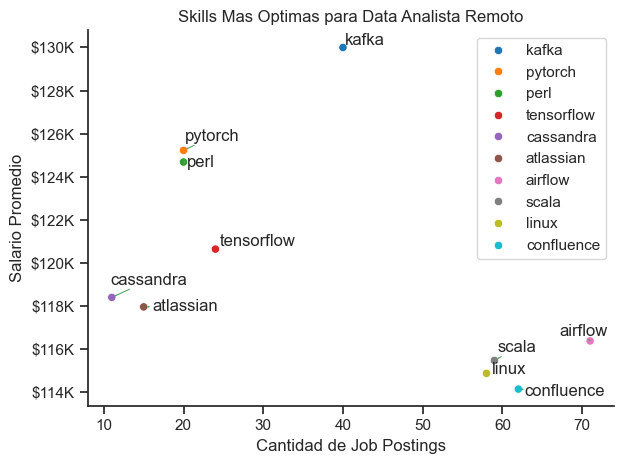

In [40]:
from matplotlib.patches import ArrowStyle
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data=df_remoto_plot, 
    x='demand_count',
    y='salary_avg',
    hue='skills',
    palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

texts = []
for i, txt in enumerate(df_remoto_plot['skills']):
    texts.append(plt.text(df_remoto_plot['demand_count'].iloc[i], df_remoto_plot['salary_avg'].iloc[i], txt))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

#adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='g', lw=0.8))  

# set axis, label, title and legend
plt.xlabel('Cantidad de Job Postings')
plt.ylabel('Salario Promedio')
plt.title('Skills Mas Optimas para Data Analista Remoto')
plt.legend()
# adjust layout and display out
plt.tight_layout()
plt.show()

In [6]:
df_onsite_plot = (
    df_onsite
    .groupby('skills', as_index=False)
    .agg({
        'salary_avg': 'mean',
        'demand_count': 'sum'
    })
    .head(10)
    .sort_values('salary_avg', ascending=False)
)
df_onsite_plot = df_onsite_plot.reset_index(drop=True)

Grafico Skills Optimas Onsite

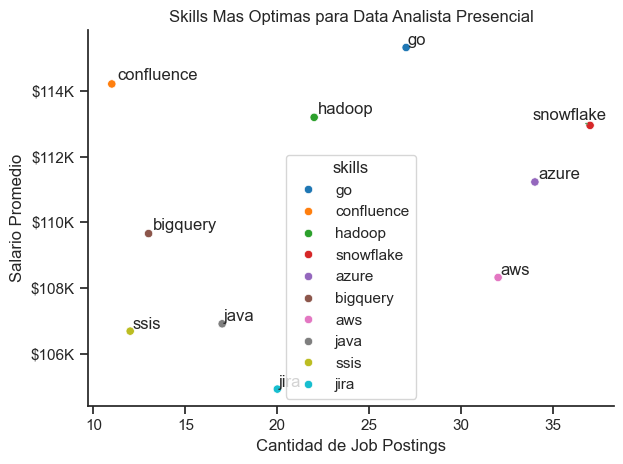

In [ ]:
from matplotlib.patches import ArrowStyle
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data=df_onsite_plot, 
    x='demand_count',
    y='salary_avg',
    hue='skills',
    palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

texts = []
for i, txt in enumerate(df_onsite_plot['skills']):
    texts.append(plt.text(df_onsite_plot['demand_count'].iloc[i], df_onsite_plot['salary_avg'].iloc[i], txt))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

#adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='g', lw=0.8))  

# set axis, label, title and legend
plt.xlabel('Cantidad de Job Postings')
plt.ylabel('Salario Promedio')
plt.title('Skills Mas Optimas para Data Analista Presencial')
plt.legend().remove()
# adjust layout and display out
plt.tight_layout()
plt.show()

Comparacion entre las dos Graficas

In [38]:
def skill_scatter(ax, df, title):
    sns.scatterplot(
        data=df,
        x='demand_count',
        y='salary_avg',
        hue='skills',
        palette='Spectral',
        s=120,               
        edgecolor='black',   
        linewidth=0.6,
        ax=ax
    )

    sns.despine(ax=ax)

    texts = []
    for _, row in df.iterrows():
        texts.append(
            ax.text(
                row['demand_count'],
                row['salary_avg'],
                row['skills'],
                fontsize=11
            )
        )

    adjust_text(
        texts,
        ax=ax,
        arrowprops=dict(arrowstyle='->', color='gray', lw=0.8),
        expand_points=(1.2, 1.2),
        expand_text=(1.2, 1.2)
    )

    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K')
    )

    ax.set_title(title)
    ax.set_xlabel('Cantidad de Job Postings')
    ax.set_ylabel('')
    ax.legend().set_visible(False)

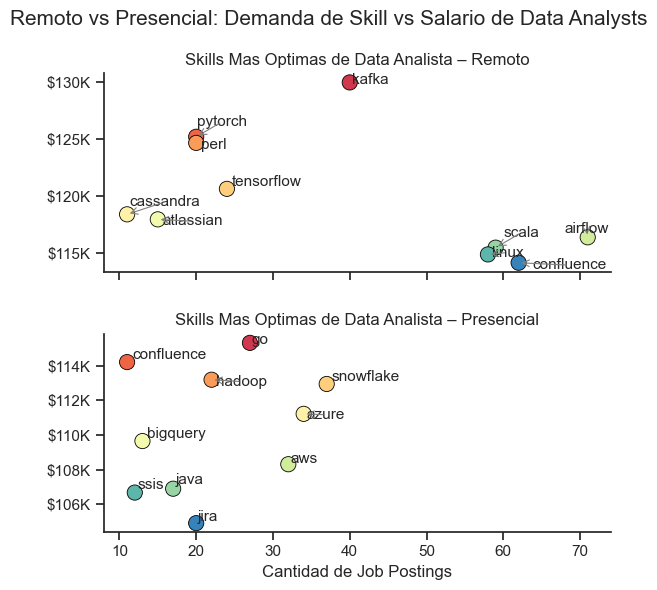

In [39]:
sns.set_theme(style='ticks')

fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

skill_scatter(
    ax=ax[0],
    df=df_remoto_plot,
    title='Skills Mas Optimas de Data Analista – Remoto'
)

skill_scatter(
    ax=ax[1],
    df=df_onsite_plot,
    title='Skills Mas Optimas de Data Analista – Presencial'
)

fig.suptitle(
    'Remoto vs Presencial: Demanda de Skill vs Salario de Data Analysts',
    fontsize=15
)

fig.tight_layout(h_pad=2)
plt.ylabel('')
plt.show()